In [51]:
## Import data prep dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

## Import modeling dependencies
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Read in our data

In [2]:
## Creature the filepath
filePath = os.path.join("Data", "crypto_data.csv")

## Read in as csv
startingDF = pd.read_csv(filePath)
startingDF["IsTrading"].unique()

array([ True, False])

### Preparing Data

In [3]:
## Discard all cryptocurrencies that are not being traded
isTraded = startingDF[startingDF["IsTrading"] == True] ## Turns out True is a boolean here and not a string.
isTraded.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
## Drop the IsTrading column
onlyTraded = isTraded.drop("IsTrading", axis = 1)
onlyTraded.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
## Remove all rows that have at least one null value
print(onlyTraded.count())
droppedNaNs = onlyTraded.dropna()
print("\nTotals with nulls dropped")
print(droppedNaNs.count())

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

Totals with nulls dropped
Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64


In [6]:
## Filter for cryptocurrencies that have been mined (Total mined > 0)
print(droppedNaNs.count())
minedCoins = droppedNaNs[droppedNaNs["TotalCoinsMined"] > 0]
print("\nTotals with mined coins > 0")
print(minedCoins.count())

Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

Totals with mined coins > 0
Unnamed: 0         532
CoinName           532
Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64


##### In order for your dataset to be comprehensible to a machine learning algorithm, 
##### its data should be numeric. Since the coin names do not contribute to the analysis of the data, 
##### delete the `CoinName` from the original dataframe.

In [7]:
## This seems a bit weird to me. How will we identify the coins afterwards?
## But the instructions demand it so here we go.
## Also the Unnamed 0 column has ticker names which also doesn't work.
## I suspect I'll have to drop this as well.
noNames = minedCoins.drop("CoinName", axis = 1)
noNames = noNames.drop("Unnamed: 0", axis = 1)
noNames.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [8]:
## Before I make my dummies, the total coins supply number should actually be a number
## So I'll convert that to a number.
print(noNames.dtypes)
noNames["TotalCoinSupply"] = noNames["TotalCoinSupply"].astype(float)
print("\nColumns with corrected data types:")
print(noNames.dtypes)

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

Columns with corrected data types:
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object


#### Make dummies.

In [9]:
## First let's check our dummy values
dummyCoins = pd.get_dummies(noNames)
print(dummyCoins.columns)
dummyCoins.head()

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now we scale the data

In [10]:
## Instatiate the Scaler
scaler = StandardScaler()

## Fit the scaler
scaledData = scaler.fit_transform(dummyCoins)

## Display data
print(scaledData[0:1])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Now that we've created our dummy variables and scaled our data, let's do some dimensionality reduction using PCA

In [11]:
## Instantiate our PCA
pca = PCA(n_components = 0.9) ## Interesting method here. If n_components is between 0 and 1 it takes it as a percentage

## Fit our PCA
scaledPCA = pca.fit_transform(scaledData)

In [12]:
## Convert our PCA back into a dataframe
pcaDF = pd.DataFrame(scaledPCA)
pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-2.776066e-14,-2.964611e-12,-8.034166e-15,-0.007129,-1.319756,-0.051813,...,-1.393458e-15,-4.632208e-15,2.901479e-15,-3.927559e-16,2.359369e-15,1.915809e-15,-1.271061e-15,2.446164e-15,-2.012667e-15,3.584736e-15
1,-0.318434,1.032331,-0.591126,0.001386,-2.777421e-14,-2.940594e-12,-7.659317e-15,-0.007739,-1.322514,-0.056674,...,-1.213636e-15,-5.617160e-15,2.575597e-15,-5.468723e-16,2.543230e-15,1.677293e-15,-1.640201e-15,1.503215e-15,-2.868878e-15,2.531458e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.954050e-14,-1.001501e-11,-2.019841e-15,-0.054781,-1.542879,-0.943951,...,3.971534e-14,7.263187e-14,-4.511906e-14,-2.671306e-14,-3.552249e-14,-7.581963e-15,2.937950e-14,1.011065e-14,-1.618718e-15,-2.163574e-14
3,-0.145184,-1.320593,0.192813,-0.001229,1.172441e-14,2.599536e-12,1.020396e-15,-0.002071,0.281463,0.251862,...,2.058124e-15,1.926354e-14,-6.249432e-15,1.611142e-15,-8.171434e-16,-5.905466e-15,6.395674e-15,-2.698072e-15,5.854962e-15,1.066747e-14
4,-0.151768,-2.036192,0.396182,-0.001705,2.692936e-14,3.604499e-12,5.690918e-17,0.027735,0.519099,0.188820,...,9.554284e-14,-3.295857e-14,-2.060245e-14,6.108279e-14,4.836339e-14,-2.003868e-14,-8.245707e-14,-7.647453e-14,-1.705355e-14,9.384198e-14


In [13]:
## Grab our explained variance ratio.
pca.explained_variance_ratio_
## A lot of these are...really low. Like 0.02 or lower. 
## That doesn't inspire a lot of confidence

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

#### Let's further reduce the dataset dimensions using t-SNE

In [48]:
## Instantiate our TSNE
tsne = TSNE(learning_rate = 35) ## Learning rate of about 35 seems to make decent clusters

## Fit our TSNE
tsne_features = tsne.fit_transform(pcaDF)

## Show our updated dimensions
tsne_features.shape

(532, 2)

#### Create a scatter plot of the TSNE results

In [49]:
tsneDF = pd.DataFrame(tsne_features)
tsneDF.head()

,0,1
0,13.158499,5.104796
1,17.117380,10.546973
2,26.099611,3.617084
3,-1.001090,-32.480461
4,-15.995928,-6.424882


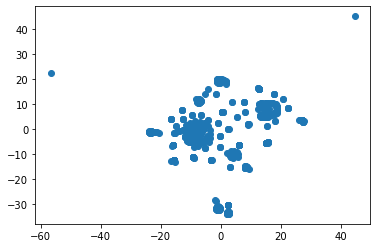

In [58]:
plt.scatter(tsneDF[0], tsneDF[1])
plt.show()

### Two well defined clusters and a few smaller defined clusters and a couple outliers. K means should help us evaluate.

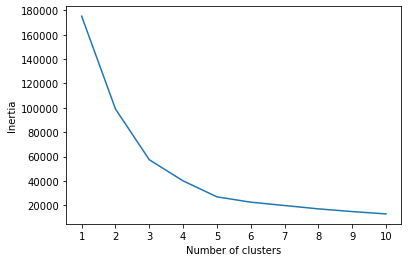

In [56]:
## Instantiate our k means. There's probably 3 clusters but we'll figure it out.

## Using similar code from our class example
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]


for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsneDF)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
elbowDF = pd.DataFrame(elbow_data)

plt.plot(elbowDF['k'], elbowDF['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
## Hmmm...Looks like either 3 or 5 are our best options. 5 Seems more appropriate.

In [57]:
##Instantiate our K means model. Trying 5 first then 3.
kmeans = KMeans(n_clusters=5)

## Fit our model
kmeans.fit(tsneDF)

## Now to set our model to a variable so we can view it in our scatter
kmeansOutput = kmeans.predict(tsneDF)

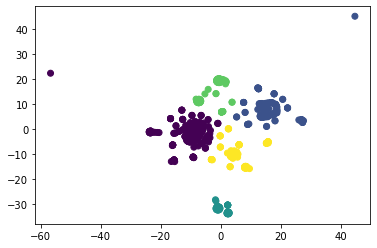

In [59]:
plt.scatter(tsneDF[0], tsneDF[1], c = kmeansOutput)
plt.show()

## Wow! Adding the colors the 5 seems perfect! After all this I would recommend that yes, these can be in clusters and in these five clusters. I imagine if we didn't drop the Unnamed: 0 column which contained the tickers for the coins that we would get different results.